# 3 - Machine Learning (ML)
*Processo de criação, treino, avaliação e validação de modelos*

Objetivo passa por criar um modelo preditivo que aprenda as relações entre os dados de entrada (features) e a variável alvo (Life expectancy) 

--- 

## 3.1 - Bibliotecas Utilizadas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer

# set style of visualization
sns.set_style("whitegrid")
sns.set_palette("RdBu")


## 2.2 - Dataset Treino

In [ ]:

df_teste = pd.read_csv('./data/Life_Expectancy_Treino.csv.csv')

## 3.2 - Preparar os Dados (Divisão do Dataset)


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Remover espaços das colunas para facilitar o uso
df_teste.columns = df_teste.columns.str.strip()

# Criar a função para visualização de colunas categóricas com gráfico de contagem
def count_plot(x_axis=None, y_axis=None, hue=None, rotation=0, top=None, data=None):
    """
    Visualiza a frequência de valores categóricos usando gráficos de contagem.
    
    Parâmetros:
    - x_axis (str): Nome da coluna a ser representada no eixo x.
    - y_axis (str): Nome da coluna a ser representada no eixo y.
    - hue (str): Coluna para adicionar diferenciação por cores.
    - rotation (int): Rotação dos rótulos no eixo x.
    - top (int): Número máximo de valores únicos a serem exibidos.
    - data (DataFrame): Conjunto de dados para visualização.

    Retorno:
    - Gráfico de contagem gerado com seaborn.
    """
    if x_axis:  # Visualizar no eixo x
        order = data[x_axis].value_counts().iloc[:top].index
    else:  # Visualizar no eixo y
        order = data[y_axis].value_counts().iloc[:top].index

    graph = sns.countplot(x=x_axis, y=y_axis, data=data, hue=hue, order=order)
    for container in graph.containers:
        graph.bar_label(container)

    plt.xticks(rotation=rotation)
    plt.show()

# Função definida e pronta para uso.
"Função de visualização de gráficos de contagem criada com sucesso."


'Função de visualização de gráficos de contagem criada com sucesso.'

In [4]:
# Criar a função para visualização de colunas categóricas usando gráfico de pizza
def pie_plot(column_name):
    """
    Visualiza a distribuição de valores categóricos com um gráfico de pizza.
    
    Parâmetros:
    - column_name (str): Nome da coluna (tipo de dado deve ser categórico ou discreto).
    
    Retorno:
    - Gráfico de pizza com porcentagens e rótulos.
    """
    plt.pie(data[column_name].value_counts(), 
            labels=data[column_name].value_counts().index, 
            shadow=True, autopct="%1.1f%%")
    plt.show()

# Função definida e pronta para uso.
"Função de visualização de gráficos de pizza criada com sucesso."


'Função de visualização de gráficos de pizza criada com sucesso.'

In [5]:
from sklearn.model_selection import train_test_split

# Dividir os dados em conjuntos de treino e teste
train, test = train_test_split(df_teste, test_size=0.2, random_state=42)

# Exibir o tamanho dos conjuntos de treino e teste
train_shape = train.shape
test_shape = test.shape

train_shape, test_shape


((2350, 22), (588, 22))

In [6]:
# Exibir o tamanho dos conjuntos de treino e teste
print(f"Shape of train data is : {train.shape}")
print("-" * 30)
print(f"Shape of test data is : {test.shape}")


Shape of train data is : (2350, 22)
------------------------------
Shape of test data is : (588, 22)


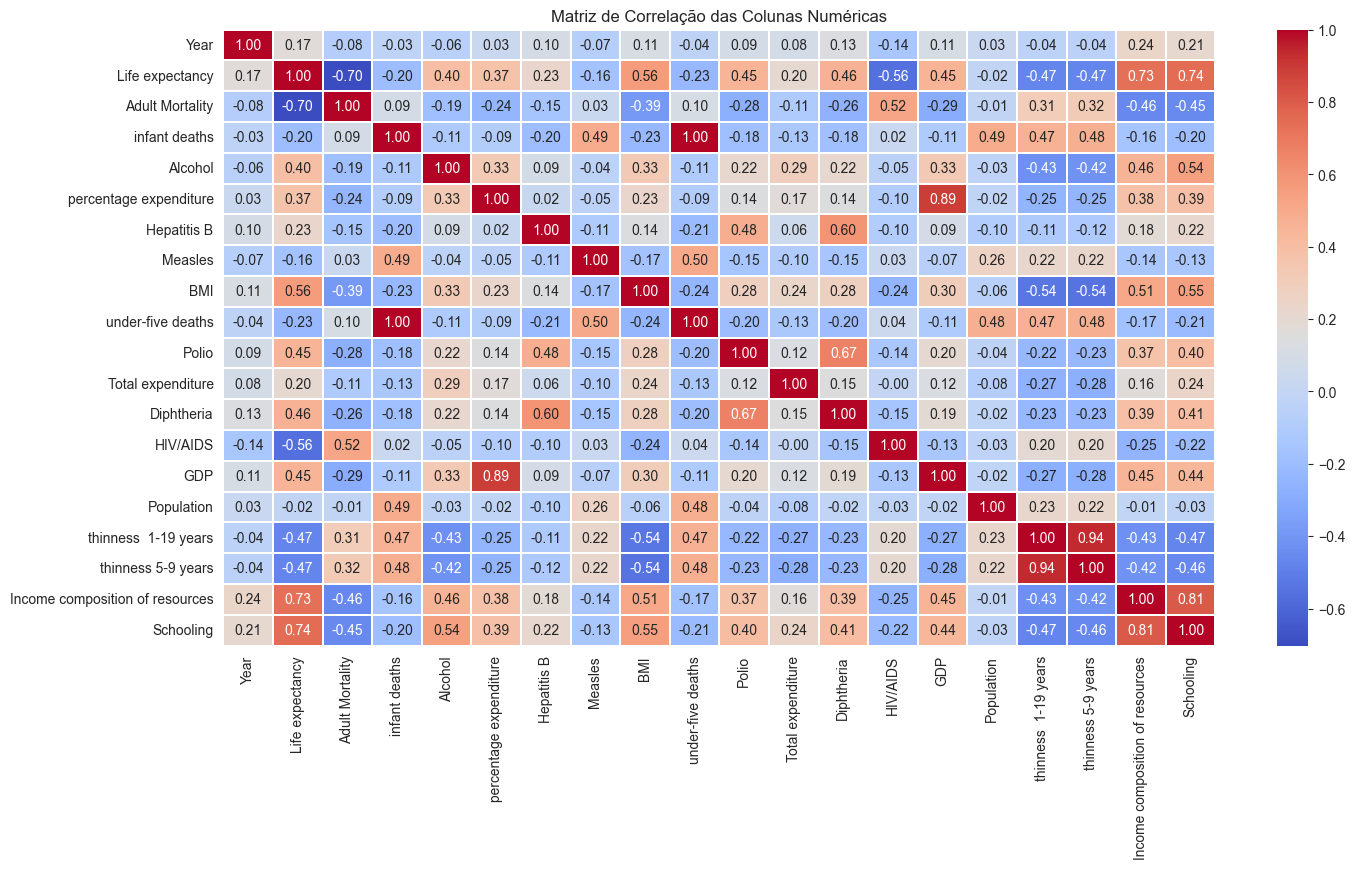

In [7]:
# Visualizar a matriz de correlação entre colunas numéricas
plt.figure(figsize=(16, 8))
sns.heatmap(train.select_dtypes(exclude='object').corr(), annot=True, fmt=".2f", linewidths=0.2, cmap='coolwarm')
plt.title("Matriz de Correlação das Colunas Numéricas")
plt.show()


## 3.3 - Treinar o Modelo

In [8]:

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Criar objeto do LabelEncoder
encoder = LabelEncoder()

# Aplicar codificação nas colunas categóricas
for column in ["Country", "Status"]:
    train[column] = encoder.fit_transform(train[column])
    test[column] = encoder.fit_transform(test[column])

# Codificação aplicada com sucesso.
"Codificação de colunas categóricas concluída."



'Codificação de colunas categóricas concluída.'

In [9]:
# see sample of training data

train.sample(2)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1584,100,2001,1,43.5,599.0,48,1.15,12.797606,NaN,150,...,86.0,5.70,9.0,25.1,146.761540,11695863.0,7.9,7.7,0.387,10.1
1978,130,2012,1,62.2,284.0,10,0.01,31.635765,68.0,0,...,81.0,4.55,74.0,1.0,271.318741,743836.0,1.3,1.3,0.501,9.9


In [10]:
# see sample of test data

test.sample(2)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1547,93,2006,0,79.4,85.0,0,11.98,15345.490700,95.0,8,...,99.0,7.75,99.0,0.1,89739.71170,472637.0,0.9,0.9,0.880,13.5
2077,126,2009,1,77.0,79.0,0,1.11,3688.694288,99.0,112,...,98.0,2.63,99.0,0.1,61478.23813,NaN,5.0,4.6,0.828,11.8


In [11]:
# Dividir o conjunto de treino em variáveis independentes (Train) e dependente (Target)
Train = train[['HIV/AIDS', 'Income composition of resources', 'Adult Mortality', 'BMI', 'under-five deaths']]
Target = train["Life expectancy"]

# Verificar as dimensões das variáveis independentes e dependente
Train_shape = Train.shape
Target_shape = Target.shape

Train_shape, Target_shape


((2350, 5), (2350,))

In [12]:
# Dividir o conjunto de teste em variáveis independentes (x_test) e dependente (y_test)
x_test = test[['HIV/AIDS', 'Income composition of resources', 'Adult Mortality', 'BMI', 'under-five deaths']]
y_test = test["Life expectancy"]

# Verificar as dimensões das variáveis independentes e dependente do conjunto de teste
x_test_shape = x_test.shape
y_test_shape = y_test.shape

x_test_shape, y_test_shape


((588, 5), (588,))

In [13]:
# Escalar os dados de treino e teste usando MinMaxScaler
scaler = MinMaxScaler()

Train = scaler.fit_transform(Train)
x_test = scaler.transform(x_test)

# Escalamento concluído com sucesso
"Os dados de treino e teste foram escalados com sucesso."


'Os dados de treino e teste foram escalados com sucesso.'

In [33]:
from sklearn.preprocessing import MinMaxScaler
import joblib

# Suponha que Train seja o conjunto de treino
scaler = MinMaxScaler()
scaler.fit(Train)  # Ajusta o scaler com base nos dados de treino

# Salve o scaler no arquivo .pkl
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

## 3.4 - Otimização (Hiperparâmetros)

In [14]:
import numpy as np

# Criar um DataFrame vazio para armazenar os resultados dos modelos
Modeling = pd.DataFrame(columns=['Model', 'Training Score', 'Test R2 Score'])

# Definir a função para selecionar e avaliar modelos
def select_model(model_name):
    global Modeling  # Acessar o DataFrame global para armazenar os resultados
    
    # Inicializar o modelo
    model = model_name
    
    # Treinar o modelo com os dados de treino
    model.fit(Train, Target)
    
    # Calcular o score no conjunto de treino
    train_score = model.score(Train, Target)
    print(f"Score do modelo {model_name} nos dados de treino: {train_score}")
    
    # Fazer previsões no conjunto de teste
    predictions = np.round(model.predict(x_test), decimals=1)
    
    # Calcular o R² no conjunto de teste
    test_r2_score = r2_score(y_test, predictions)
    print(f"R² do modelo {model_name} nos dados de teste: {test_r2_score}")
    
    # Criar um DataFrame com os scores do modelo
    model_scores = pd.DataFrame({'Model': [str(model_name)],
                                 'Training Score': [train_score], 
                                 'Test R2 Score': [test_r2_score]})
    
    # Concatenar os resultados ao DataFrame Modeling
    Modeling = pd.concat([Modeling, model_scores], ignore_index=True)

# Função criada com sucesso.
"Função de avaliação de modelos definida com sucesso."




'Função de avaliação de modelos definida com sucesso.'

In [20]:
# Remover linhas com valores ausentes do conjunto de treino e teste
train = train.dropna()
test = test.dropna()

# Atualizar as variáveis independentes e dependentes após remoção
Train = train[['HIV/AIDS', 'Income composition of resources', 'Adult Mortality', 'BMI', 'under-five deaths']]
Target = train["Life expectancy"]

x_test = test[['HIV/AIDS', 'Income composition of resources', 'Adult Mortality', 'BMI', 'under-five deaths']]
y_test = test["Life expectancy"]

# Verificar o tamanho após a remoção
train_shape = train.shape
test_shape = test.shape

train_shape, test_shape


((1327, 22), (322, 22))

In [23]:
# Reavaliar os modelos após remoção de dados ausentes
select_model(LinearRegression())
select_model(SVR(C=9.0, epsilon=0.9, kernel='rbf'))
select_model(RandomForestRegressor(n_estimators=100, max_depth=7, min_samples_split=5))
select_model(GradientBoostingRegressor(n_estimators=100, max_depth=6, min_samples_split=5))

# Exibir os resultados dos modelos avaliados
import ace_tools as tools; tools.display_dataframe_to_user(name="Model Performance After Missing Data Removal", dataframe=Modeling)


Score do modelo LinearRegression() nos dados de treino: 0.7815146485684488
R² do modelo LinearRegression() nos dados de teste: 0.7909268340322452
Score do modelo SVR(C=9.0, epsilon=0.9) nos dados de treino: 0.787614626990475
R² do modelo SVR(C=9.0, epsilon=0.9) nos dados de teste: 0.8178250850775429
Score do modelo RandomForestRegressor(max_depth=7, min_samples_split=5) nos dados de treino: 0.9623670825896948
R² do modelo RandomForestRegressor(max_depth=7, min_samples_split=5) nos dados de teste: 0.9484958657272986
Score do modelo GradientBoostingRegressor(max_depth=6, min_samples_split=5) nos dados de treino: 0.9916780552778918
R² do modelo GradientBoostingRegressor(max_depth=6, min_samples_split=5) nos dados de teste: 0.9592931299828077


## 3.5 - Resultados 


                           Training Score  Test R2 Score
LinearRegression                 0.781515       0.790927
SVR                              0.787615       0.817825
RandomForestRegressor            0.962639       0.949664
GradientBoostingRegressor        0.991678       0.959321
4                                0.781515       0.790927
5                                0.787615       0.817825
6                                0.962367       0.948496
7                                0.991678       0.959293


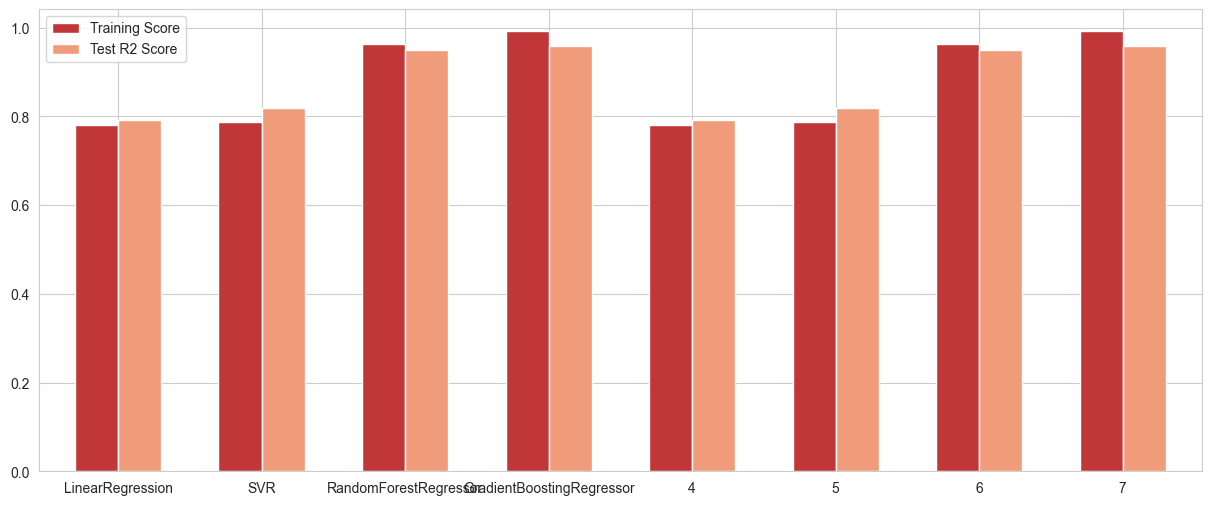

In [31]:
# Verificar e remover a coluna "Model" apenas se existir
if "Model" in Modeling.columns:
    Modeling.drop(columns="Model", inplace=True)

print(Modeling)  # Para exibir os dados diretamente

Modeling.plot(kind = "bar", figsize = (15,6), width = 0.6)
plt.xticks(rotation = 0)
plt.show()


## 3.6 - Dataset Final

In [30]:
# Guardar o DataFrame final com os resultados dos modelos em um arquivo CSV
output_path = './data/Life_Expectancy_Final.csv'
Modeling.to_csv(output_path)

output_path


'./data/Life_Expectancy_Final.csv'

In [32]:
from sklearn.ensemble import GradientBoostingRegressor
import joblib

# Suponha que o modelo esteja treinado
model = GradientBoostingRegressor()
# Treine o modelo e salve-o
joblib.dump(model, "life_expectancy_model.pkl")


['life_expectancy_model.pkl']